# Task 1

**1. Create a random 4x4 array from an exponential distribution**

In [ ]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

Generate a 4x4 array from the exponential distribution


In [ ]:
random_array = np.random.exponential(scale = 1, size=(4, 4))
print(random_array)

[[2.10057124 1.60834309 0.05750348 0.12526851]
 [1.79036603 0.13903724 0.22752134 1.50645637]
 [1.95177782 0.6010199  1.05993689 3.03642824]
 [0.32693734 0.59139466 3.67002385 0.27632557]]


**2. Create a random 100000x1 array from the same exponential distribution and visualize the distribution histogram along with uniform and normal distributions.**

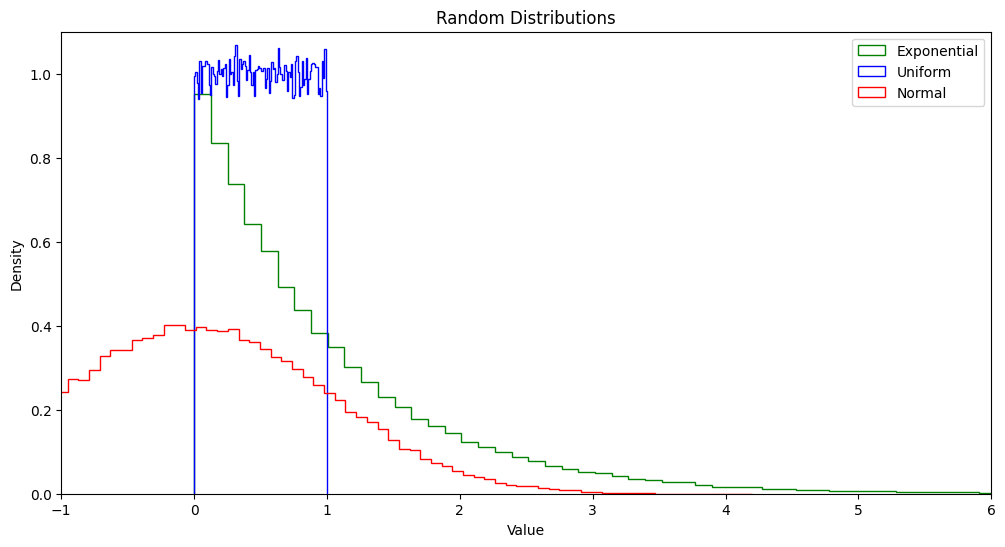

In [ ]:
# Generate a random 100000x1 array from an exponential distribution
exp_data = np.random.exponential(scale = 1, size=100000)

# Generate data from uniform and normal distributions for comparison
uniform_data = np.random.rand(100000)
normal_data = np.random.normal(size=100000)

# Plot the histograms
plt.figure(figsize=(12, 6))

# Exponential distribution
plt.hist(exp_data, density=True, bins=100, histtype="step", color="green", label="Exponential")

# Uniform distribution
plt.hist(uniform_data, density=True, bins=100, histtype="step", color="blue", label="Uniform")

# Normal distribution
plt.hist(normal_data, density=True, bins=100, histtype="step", color="red", label="Normal")

# Set the axis view to better visualize the distributions
plt.axis([-1, 6, 0, 1.1])

# Add legend, titles, and labels
plt.legend(loc="upper right")
plt.title("Random Distributions")
plt.xlabel("Value")
plt.ylabel("Density")

# Show the plot
plt.show()


**3. Using matplotlib, plot the Z = X2 + Y2 in a 3D plot**

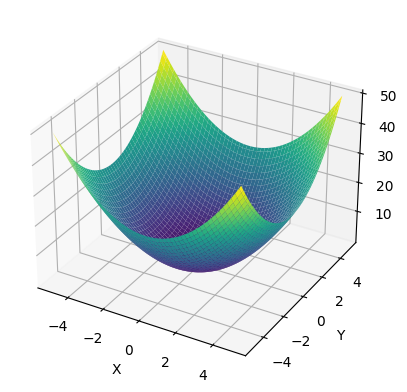

In [ ]:
# Generate X and Y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


**4. Calculate the Pearson and Spearman correlation coefficients and visualize them using heatmaps**

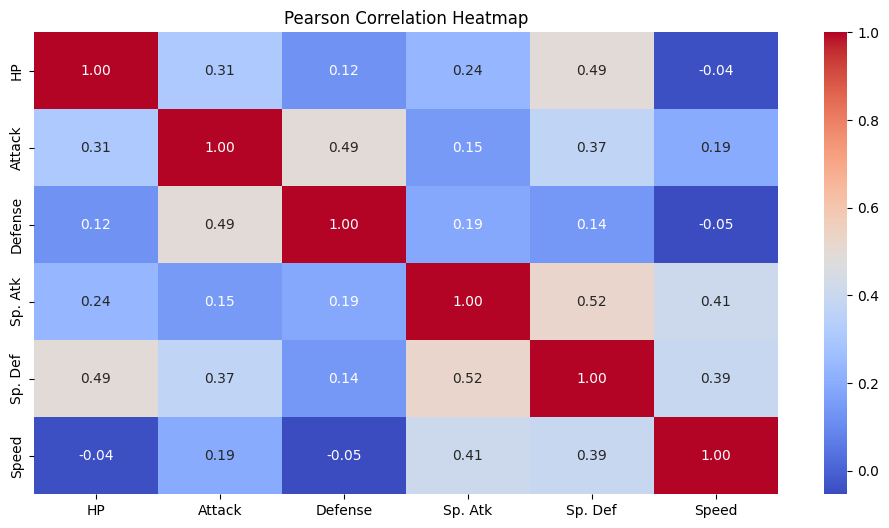

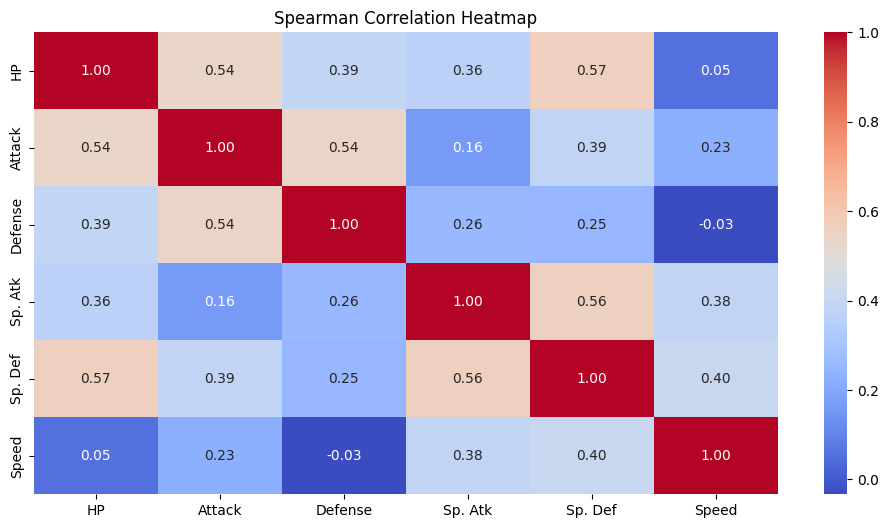

In [ ]:
# Load the seaborn dataset
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

# Select the features
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
data = df[features]

# Calculate Pearson and Spearman correlations
pearson_corr = data.corr(method='pearson')
spearman_corr = data.corr(method='spearman')

# Plot Pearson correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

# Plot Spearman correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Heatmap')
plt.show()


# Task 2



**1. Create a new dataframe by filtering all the columns [i.e., features] except N_total, N_bulk, N_surface and R_avg columns.**

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('./Au_nanoparticle_dataset.csv')

# Filter the required columns
new_df = df.drop(columns=['N_total', 'N_bulk', 'N_surface', 'R_avg'])

In [3]:
# Display the first 20 samples of the new dataframe
print(new_df.head(20))

    ID    T       tau  time        Volume    R_min    R_max   R_diff   R_std  \
0    1  273  0.000025     1  2.710000e-26  15.5898  19.4516   3.8618  0.6230   
1    2  273  0.000025     2  2.780000e-26  15.3996  24.1755   8.7760  0.9295   
2    3  273  0.000025     3  7.850000e-26  21.9199  31.0305   9.1106  1.0701   
3    4  273  0.000025     4  1.220000e-25  23.2542  37.8795  14.6253  2.3732   
4    5  273  0.000025     5  1.860000e-25  27.1200  39.7614  12.6415  1.9397   
5    6  273  0.000025     6  2.260000e-25  33.2496  42.9612   9.7116  1.0219   
6    7  273  0.000025     7  2.340000e-25  33.6164  41.6168   8.0004  0.8979   
7    8  273  0.000025     8  2.360000e-25  34.5185  41.4386   6.9201  0.8595   
8    9  273  0.000025     9  2.370000e-25  34.7525  41.5998   6.8473  0.8483   
9   10  273  0.000025    10  2.380000e-25  34.7870  41.5401   6.7531  0.8308   
10  11  273  0.000050     1  2.600000e-26  15.0408  18.6580   3.6172  0.6360   
11  12  273  0.000050     2  2.640000e-2

In [4]:
# Calculate mean, standard deviation and quartile values
features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
stats = df[features].describe().loc[['mean', 'std', '25%', '50%', '75%']]
print(stats)

          N_total       N_bulk   N_surface      R_avg
mean  3476.786500  2521.550250   955.23625  20.654363
std   3679.286769  2976.232459   721.87022   7.610716
25%   1061.000000   618.750000   437.00000  15.160725
50%   1867.000000  1199.000000   666.00000  18.629250
75%   4503.000000  3183.000000  1301.75000  25.525125


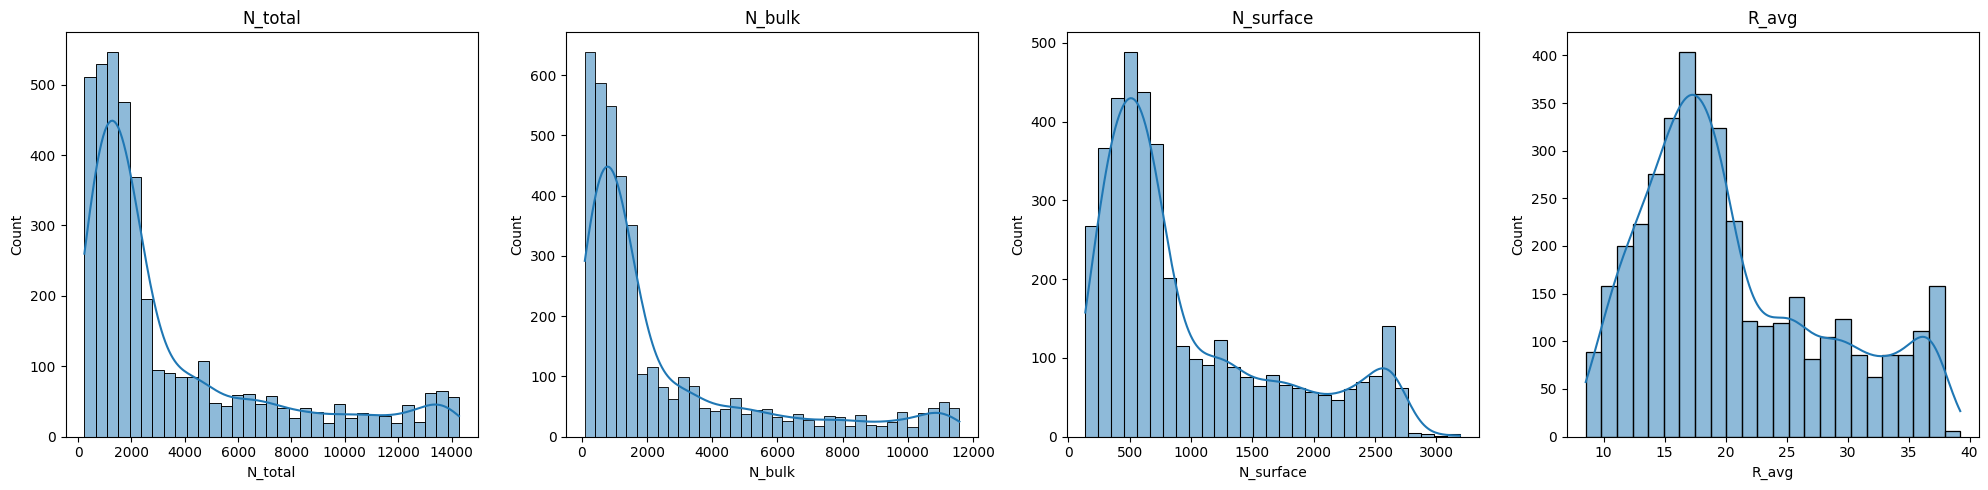

In [5]:
# Plot histograms for the features
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axes[i], kde=True)
    axes[i].set_title(feature)
plt.tight_layout()
plt.show()

In [ ]:
# Visualize scatter plots and histograms using pairplot
sns.pairplot(new_df)
plt.show()

In [ ]:
# Customized PairGrid visualization
g = sns.PairGrid(df[features])
g.map_upper(sns.histplot)  # bivariate histogram
g.map_diag(sns.histplot, kde=True)  # histogram with KDE on diagonal
g.map_lower(sns.kdeplot)  # bivariate KDE plot on lower half
plt.show()